<a href="https://www.kaggle.com/code/risakashiwabara/eda-try-all-markers-available-in-matplotlib?scriptVersionId=157169199" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="font-family:verdana;"> <center>🌸Monthly graph writing_2 types🌸</center> </h1>
<p><center style="color:Black; font-family:Cormorant Garamond; font-size:25px;text-align: left;">
Recommended for the following people</center></p>


<p><center style="color:Black; font-family:Cormorant Garamond; font-size:20px;text-align: left;">
・I want to look it up by year and month.<br> 
・I want to draw a graph with the year on the horizontal axis.<br>
・I want to see the trend by month.</center></p>


<p><center style="color:#ff8c00; font-family:Cormorant Garamond; font-size:30px;">Thanks for visiting my notebook📖👀 </center></p>


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/NMH78yYb/publicdomainq-0064208.jpg);font-family:Meiryo UI;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px">  Sample data acquisition</p>

In [1]:
pip install xlrd --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import xlrd

In [3]:
df_data = pd.read_csv('/kaggle/input/japandairy-product-consumption-in-japan/Raw milk throughput.csv', index_col=0)
df_reset = df_data.reset_index('year')
df_index = df_reset [1:38]
df_columns = df_index.iloc[:,0:13]
# df = df_columns.drop('total', axis=1)
df = df_columns.dropna(how='all')

In [4]:
num_features = df.columns[1:13]
df[num_features].describe()

,total,1,2,3,4,5,6,7,8,9,10,11
count,36,36,36,36,36,36,36,36,36,36,36,36
unique,36,36,36,36,36,36,36,36,36,36,36,36
top,"4,324,273","320,603","326,379","340,303","351,056","383,593","389,002","383,706","365,949","393,797","378,407","350,735"
freq,1,1,1,1,1,1,1,1,1,1,1,1


In [5]:
col = ['year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df.columns=['year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [6]:
df['year'] = df['year'].astype(int)
df_=df.replace(",","", regex=True)
df_ = df_.astype('int')
df_.dtypes
df_

/tmp/ipykernel_19/1087369985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)


,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,1986,4324273,320603,326379,340303,351056,383593,389002,383706,365949,393797,378407,350735
2,1987,4519018,326540,333118,345520,367996,399813,410604,408293,383623,410005,402085,372499
3,1988,4761071,348997,363990,371246,385205,417713,425727,421452,393941,428517,424208,393033
4,1989,4947141,373254,372680,398272,407411,429265,437050,441143,414347,444983,433028,407117
5,1990,5059835,374628,376103,402043,406713,439525,452550,457256,432308,456471,450160,414900
6,1991,5091836,387625,387800,408501,414491,448455,456224,456017,424135,449636,445643,415058
7,1992,5131700,392327,403398,413749,418349,447671,454976,454334,424056,464989,445079,413143
8,1993,5032403,390018,386308,410475,419052,444073,446506,440312,402963,443316,436889,416863
9,1994,5237372,388126,386952,409583,426121,453021,463854,481714,455608,469827,456416,433994
10,1995,5143381,403643,391481,414919,417613,443297,441395,450436,439277,456626,452612,421838


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/NMH78yYb/publicdomainq-0064208.jpg);font-family:Meiryo UI;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> ①　describe</p>

In [7]:
#'jan'has a high production throughput.
# Statistical details
df_.iloc[:, 1:2].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='Greens')\
                     .bar(subset=["max"], color='#F8766D')\
                     .bar(subset=["mean",], color='#00BFC4')

,count,mean,std,min,25%,50%,75%,max
Jan,36.000000,4587500.944444,476941.839645,3910940.000000,4037792.750000,4704631.000000,5009799.500000,5237372.000000


In [8]:
# Statistical details
df_.iloc[:, 2:].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='Greens')\
                     .bar(subset=["max"], color='#F8766D')\
                     .bar(subset=["mean",], color='#00BFC4')

,count,mean,std,min,25%,50%,75%,max
Aug,36.000000,403576.611111,46457.854661,336918.000000,355948.250000,412301.000000,443378.500000,481714.000000
Oct,36.000000,406956.500000,45292.333532,337971.000000,358233.750000,419224.000000,447192.750000,469827.000000
Jul,36.000000,403566.888889,42860.108056,345482.000000,351786.750000,414983.000000,440949.500000,463854.000000
Sep,36.000000,382418.611111,42201.043250,316585.000000,337278.750000,391755.000000,418026.000000,455608.000000
Nov,36.000000,401763.500000,41604.125463,343925.000000,355725.250000,411110.000000,445220.000000,456416.000000
Jun,36.000000,399249.138889,41438.598493,335101.000000,351540.500000,407924.000000,438428.500000,453896.000000
May,36.000000,373608.555556,39597.612306,314441.000000,327783.500000,382776.500000,409879.250000,426121.000000
Apr,36.000000,368590.611111,39231.816757,311006.000000,325774.500000,373063.000000,406056.500000,420431.000000
Dec,36.000000,376367.472222,38562.672373,324519.000000,332620.750000,384321.500000,413582.250000,433994.000000
Mar,36.000000,351785.861111,35683.713032,298632.000000,313984.500000,359967.000000,383759.000000,403967.000000


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/NMH78yYb/publicdomainq-0064208.jpg);font-family:Meiryo UI;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> ②graph-plot- markerchange</p>

### The plot graphs can be modified by changing the markings.

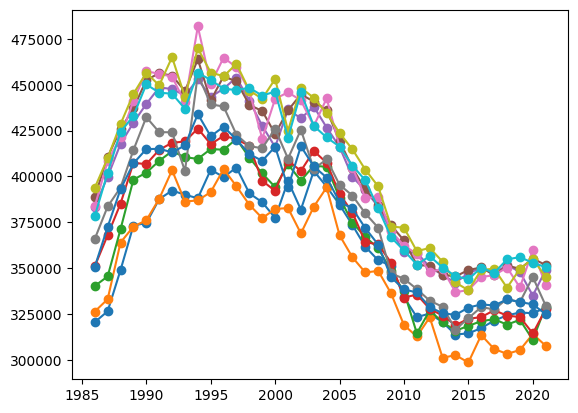

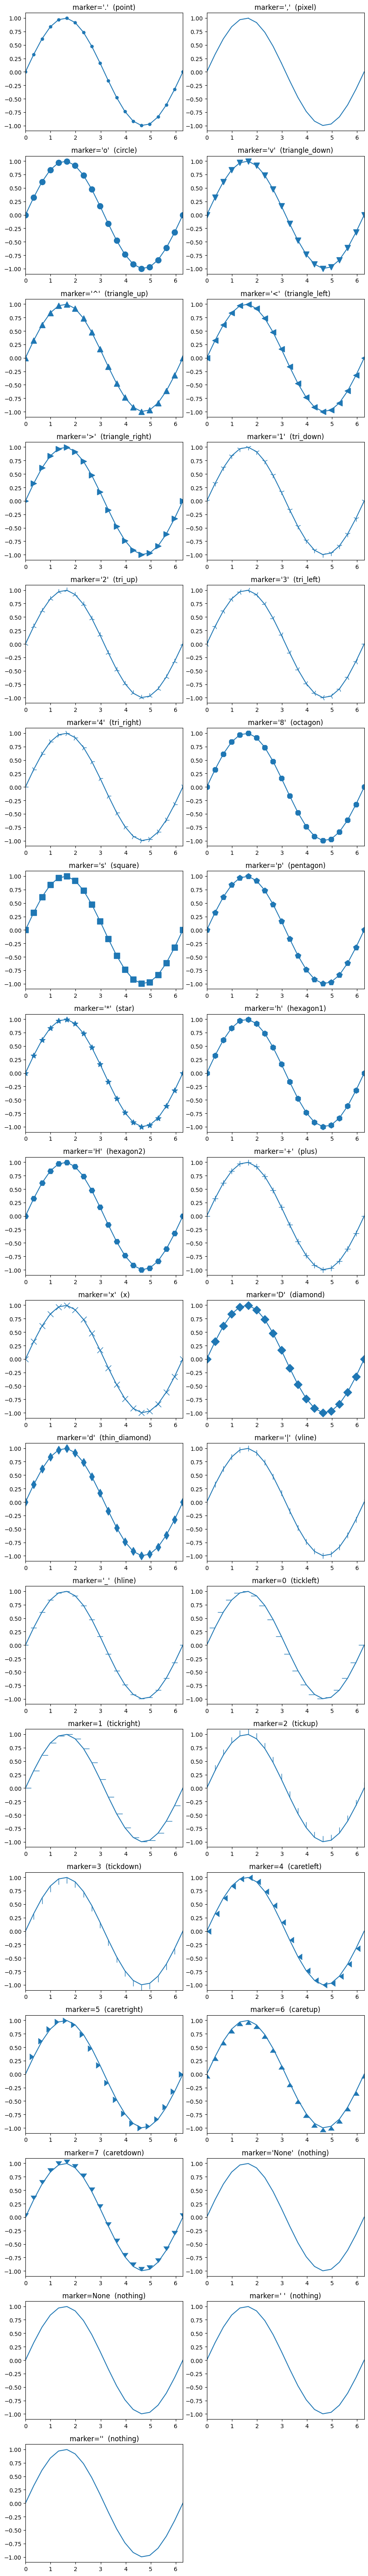

In [9]:
import math
from collections import OrderedDict
from matplotlib.markers import TICKLEFT, TICKRIGHT, TICKUP, TICKDOWN, CARETLEFT, CARETRIGHT, CARETUP, CARETDOWN
 
x = np.linspace(0, 2.0 * math.pi, 20)
y = np.sin(x)
 
markers = OrderedDict([
    ('.', 'point'),
    (',', 'pixel'),
    ('o', 'circle'),
    ('v', 'triangle_down'),
    ('^', 'triangle_up'),
    ('<', 'triangle_left'),
    ('>', 'triangle_right'),
    ('1', 'tri_down'),
    ('2', 'tri_up'),
    ('3', 'tri_left'),
    ('4', 'tri_right'),
    ('8', 'octagon'),
    ('s', 'square'),
    ('p', 'pentagon'),
    ('*', 'star'),
    ('h', 'hexagon1'),
    ('H', 'hexagon2'),
    ('+', 'plus'),
    ('x', 'x'),
    ('D', 'diamond'),
    ('d', 'thin_diamond'),
    ('|', 'vline'),
    ('_', 'hline'),
    (TICKLEFT, 'tickleft'),
    (TICKRIGHT, 'tickright'),
    (TICKUP, 'tickup'),
    (TICKDOWN, 'tickdown'),
    (CARETLEFT, 'caretleft'),
    (CARETRIGHT, 'caretright'),
    (CARETUP, 'caretup'),
    (CARETDOWN, 'caretdown'),
    ('None', 'nothing'),
    (None, 'nothing'),
    (' ', 'nothing'),
    ('', 'nothing')
])

df = df_.drop('Jan', axis=1)
df_melted = pd.melt(df, id_vars=['year'], var_name='Month', value_name='Data')
for month in df_melted['Month'].unique():
    plt.plot(df_melted[df_melted['Month'] == month]['year'], df_melted[df_melted['Month'] == month]['Data'], label=month, marker='o')
    df_melted = df_melted[df_melted['Month'] != 'Jan']
 
plt.figure(figsize=(9, len(markers)*1.8))
i = 1
for m, desc in markers.items():
    plt.subplot(math.ceil(len(markers)/2.0), 2, i)
    plt.plot(x, y, marker=m, markersize=10)
    if isinstance(m, str):
        plt.title('marker=\'' + m + '\'' + '  (' + desc + ')')
    else:
        plt.title('marker=' + str(m) + '  (' + desc + ')')
    plt.xlim(x.min(), x.max())
    i += 1
 
plt.tight_layout() 




## Recommendations　（marker='.'）

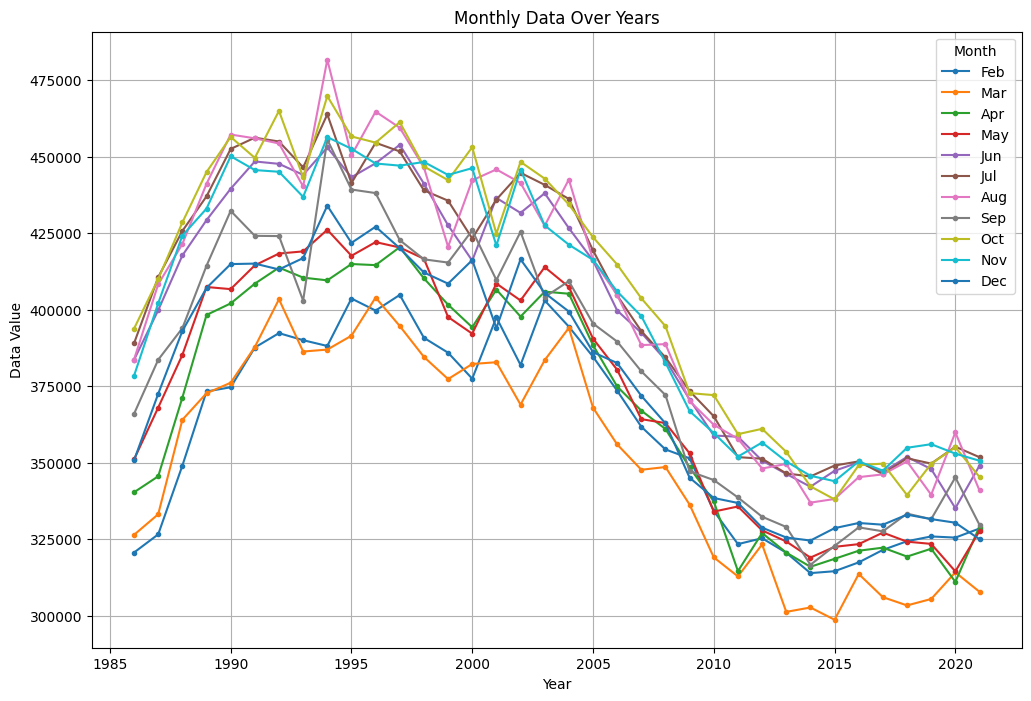

In [10]:
df = df_.drop('Jan', axis=1)
df_melted = pd.melt(df, id_vars=['year'], var_name='Month', value_name='Data')
# Plotting
plt.figure(figsize=(12, 8))
for month in df_melted['Month'].unique():
    plt.plot(df_melted[df_melted['Month'] == month]['year'], df_melted[df_melted['Month'] == month]['Data'], label=month, marker='.')
    df_melted = df_melted[df_melted['Month'] != 'Jan']
    
plt.title('Monthly Data Over Years')
plt.xlabel('Year')
plt.ylabel('Data Value')
plt.legend(title='Month')
plt.grid(True)

plt.show()